# BUSINESS PROBLEM:

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

#### PACKAGE IMPORTS

Firstly, we need to import libraries and packages taht we will need in our codes:

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### READING THE DATA

Since we have the data provided and loaded on this folder, we now need to read the components of the .csv file

In [314]:
# aviation_data = pd.read_csv('AviationData2.csv')
with open('AviationData.csv') as aviation_data:
    df = aviation_data.read()

To read the data as is, we can use the panda package, the .read_csv extension, to read the file:

In [315]:
aviation_data2 = pd.read_csv('AviationData.csv', encoding='latin-1')

C:\Users\Stephen Kamiru\AppData\Local\Temp\ipykernel_20104\3331396613.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data2 = pd.read_csv('AviationData.csv', encoding='latin-1')


### CONVERTING THE DATA INTO A DATAFRAME

* We have now read the components of the data.
* We now need to convert the data to a DataFranme so that we may anaylze it and manipulate it.

In [316]:
avt2 = pd.DataFrame(aviation_data2)
avt2.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


### TRANSPOSING THE DATAFRAME

Sinces the dataframe has several columns, we could transpose the dataframe to view the columns as rows. This could simply be countered by using `.columns`

In [317]:
avt2.head().T

,0,1,2,3,4
Event.Id,20001218X45444,20001218X45447,20061025X01555,20001218X45448,20041105X01764
Investigation.Type,Accident,Accident,Accident,Accident,Accident
Accident.Number,SEA87LA080,LAX94LA336,NYC07LA005,LAX96LA321,CHI79FA064
Event.Date,1948-10-24,1962-07-19,1974-08-30,1977-06-19,1979-08-02
Location,"MOOSE CREEK, ID","BRIDGEPORT, CA","Saltville, VA","EUREKA, CA","Canton, OH"
Country,United States,United States,United States,United States,United States
Latitude,NaN,NaN,36.922223,NaN,NaN
Longitude,NaN,NaN,-81.878056,NaN,NaN
Airport.Code,NaN,NaN,NaN,NaN,NaN
Airport.Name,NaN,NaN,NaN,NaN,NaN


### DUPLICATE VALUES

Check for the existence of duplicate values in the data. This could bring about inconsistencies and thus the need to remove them.

In [318]:
avt2.duplicated().any()

np.False_

### INFO OF THE DATAFRAME

This returns details of the DataFrame and the values inside it. This is important as it can be used to identify the data types of the values in the DataFrame and also if there are null values in the data.

In [319]:
avt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

### NULL VALUES


Some data usually contain null values. From runnig the `info()` command, we getb to see that our data is no different. There are so many null values in the data. The line of code below will affirm if each column has a null value. 
* `False` means that that column has no null values
* `True` means that there exists some null values

In [320]:
avt2.isnull().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

* The above output simply shows that there exists null values. But how many null values are there?
* By using `sum()` we get to see the exact number of null values in the columns.
* We then arrange them in descending order so that we may identify columns with the highest number of null values and those with the least/ none

In [321]:
missing_values = avt2.isnull().sum()

missing_values.sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Accident.Number               0
Investigation.Type            0
Event.Id                      0
Event.Date                    0
dtype: i

* The numbers are a great indicator of how much null values exist in each column.
* However, the percentage of these values would provide a better insight of the same.

In [322]:
percentage_missing = np.round(((avt2.isnull().sum())/(len(avt2))*100),4)

percentage_missing.sort_values(ascending=False)

Schedule                  85.8453
Air.carrier               81.2710
FAR.Description           63.9742
Aircraft.Category         63.6772
Longitude                 61.3304
Latitude                  61.3203
Airport.Code              43.6016
Airport.Name              40.7081
Broad.phase.of.flight     30.5606
Publication.Date          15.4924
Total.Serious.Injuries    14.0737
Total.Minor.Injuries      13.4246
Total.Fatal.Injuries      12.8261
Engine.Type                7.9830
Report.Status              7.1820
Purpose.of.flight          6.9660
Number.of.Engines          6.8445
Total.Uninjured            6.6510
Weather.Condition          5.0535
Aircraft.damage            3.5932
Registration.Number        1.5547
Injury.Severity            1.1250
Country                    0.2542
Amateur.Built              0.1147
Model                      0.1035
Make                       0.0709
Location                   0.0585
Accident.Number            0.0000
Investigation.Type         0.0000
Event.Id      

* Now that we have both the count of the null values and the percentage of the null values, we can now create a DataFrame containing the 2 and perform a cleanup on the new DataFrame

In [323]:
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values.values,
    'Percentage': percentage_missing.values
}, index=missing_values.index)

missing_data_df

,Missing Values,Percentage
Event.Id,0,0.0000
Investigation.Type,0,0.0000
Accident.Number,0,0.0000
Event.Date,0,0.0000
Location,52,0.0585
Country,226,0.2542
Latitude,54507,61.3203
Longitude,54516,61.3304
Airport.Code,38757,43.6016
Airport.Name,36185,40.7081


* Since we are trying to clean the data, we only need the columns that indeed contain the null values.
* Therefore, we will start by dropping the columns that do not have missing values.

In [324]:
missing_data_df.drop(missing_data_df[missing_data_df['Missing Values'] == 0].index, inplace=True)
missing_data_df.sort_values(ascending=False, by='Missing Values')

,Missing Values,Percentage
Schedule,76307,85.8453
Air.carrier,72241,81.2710
FAR.Description,56866,63.9742
Aircraft.Category,56602,63.6772
Longitude,54516,61.3304
Latitude,54507,61.3203
Airport.Code,38757,43.6016
Airport.Name,36185,40.7081
Broad.phase.of.flight,27165,30.5606
Publication.Date,13771,15.4924


### DROPPING ROW WITH A HIGH AMOUNT OF MISSING VALUES

* There are columns that have a lot of missing values.
* This means that these columns cannot be used and the missing values cannot be replaced.
* Therefore, we will drop these columns fully.

In [325]:
drop_large_missing_values = avt2.drop(['Schedule','Air.carrier','FAR.Description'], axis=1, inplace=True)
drop_large_missing_values

In [326]:
avt = avt2.drop(['Longitude','Latitude','Airport.Code','Broad.phase.of.flight'], axis=1, inplace=True)
avt

### WHAT NEXT AFTER DROPPING DATA?

First, we confirm if the dropped columns still appear.

In [327]:
avt2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

### ADDING A COLUMN TO THE DATAFRAME.

* We would like to link the make and model columns into a singular column called `Aircraft`. 
* This can be done by first dropping the rows in these 2 columns that have missing values then combining the 2

In [328]:
# Drop rows where critical data is missing in the Make or Model columns
avt2.dropna(subset=['Make', 'Model'], inplace=True)

# Combine Make and Model into one column (Aircraft)
avt2['Aircraft'] = avt2['Make'] + ' ' + avt2['Model']


Confirm if the `Make` and `Model` columns exist and if there is an additional column called `Aircraft`

In [329]:
avt2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date', 'Aircraft'],
      dtype='object')

### Reccommendations to the stakeholders

What questions are we looking to ask?
* What planes are prone to accidents? (make and model)
* What planes, when an accident occurs, is prone to fatalities?
* What locations have experienced the largest amounts of accidents?
* In the event an accident, what sort of damages do the planes acquire?
* Does the number of engines and/or the engine type have a correlation to the occurrence of accidents?
* What type of aircraft is usually preferred for what purpose? (In our case, we are mainly focused on commercial and private emterprise)
* Which air carrier has experienced the most accidents and fatalities.
* Compare the total serious, fatal and minor injuries as well as the uninjured.
* Are there flights that are prone to accidents during specific weather conditions?




## REPRSENTING OUR FINDINGS VISUALLY

Based off the questions described above, we could now represnt them visually as seen below.

#### 1.What planes are prone to accidents?
Here, we will use the Aircraft column that we created to state exactly the make and model of the plane that is prone to accidents.

C:\Users\Stephen Kamiru\AppData\Local\Temp\ipykernel_20104\3406800030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aircraft_accidents.index, y=aircraft_accidents.values, palette='coolwarm')


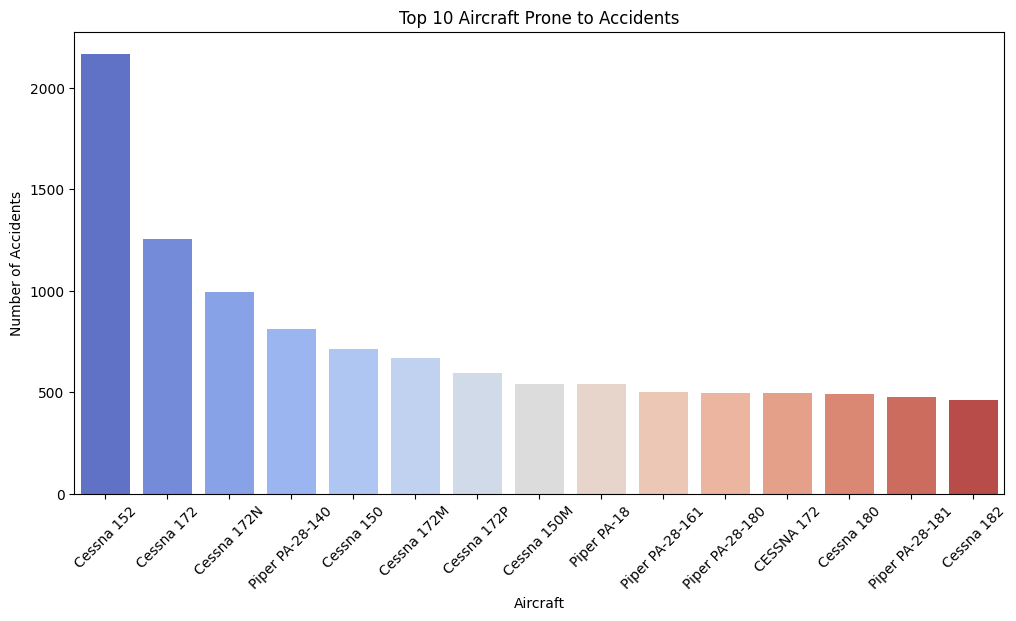

In [373]:
aircraft_accidents = avt2['Aircraft'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=aircraft_accidents.index, y=aircraft_accidents.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Prone to Accidents')
plt.xlabel('Aircraft')
plt.ylabel('Number of Accidents')
plt.show()

Now that we have identified the top 10 planes to basically `avoid`, what then are the planes to go for?
* Below, we get to see the top 10 planes that are less prone to accidents!

C:\Users\Stephen Kamiru\AppData\Local\Temp\ipykernel_20104\2111584360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aircraft_accidents.index, y=aircraft_accidents.values, palette='coolwarm')


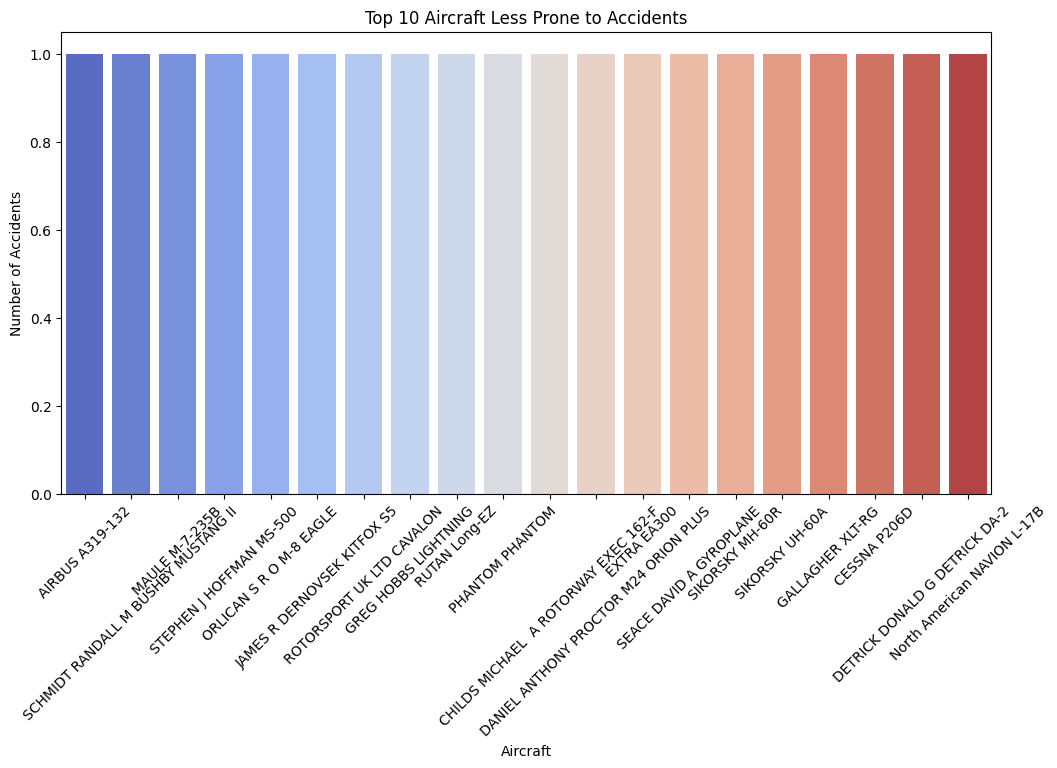

In [377]:
aircraft_accidents = avt2['Aircraft'].value_counts().tail(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=aircraft_accidents.index, y=aircraft_accidents.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Less Prone to Accidents')
plt.xlabel('Aircraft')
plt.ylabel('Number of Accidents')
plt.show()

* The code below shows the plane with the highest count thus indicating that the visual indication so far is correct.

In [332]:
avt2['Aircraft'].value_counts().head(20)

Aircraft
Cessna 152         2168
Cessna 172         1254
Cessna 172N         996
Piper PA-28-140     812
Cessna 150          716
Cessna 172M         667
Cessna 172P         597
Cessna 150M         539
Piper PA-18         539
Piper PA-28-161     502
Piper PA-28-180     499
CESSNA 172          499
Cessna 180          494
Piper PA-28-181     476
Cessna 182          464
Piper PA-38-112     444
Piper PA-18-150     437
BOEING 737          435
Bell 206B           421
Cessna 150L         410
Name: count, dtype: int64

#### 2.WHAT PLANES AFTER AN ACCIDENT HAS MORE FATALITIES?

* We have identified from the dataset that there are a nmber of fatalities that have been recorded since data was first collected. 
* Now, since we want to obtain customers and retain them, one of the best things to do is ensure customer safety.
* This can be done be viewing the planes with the most fatalities and maybe steer away from them.

C:\Users\Stephen Kamiru\AppData\Local\Temp\ipykernel_20104\1421442943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_accidents.index, y=fatal_accidents.values, palette='Reds')


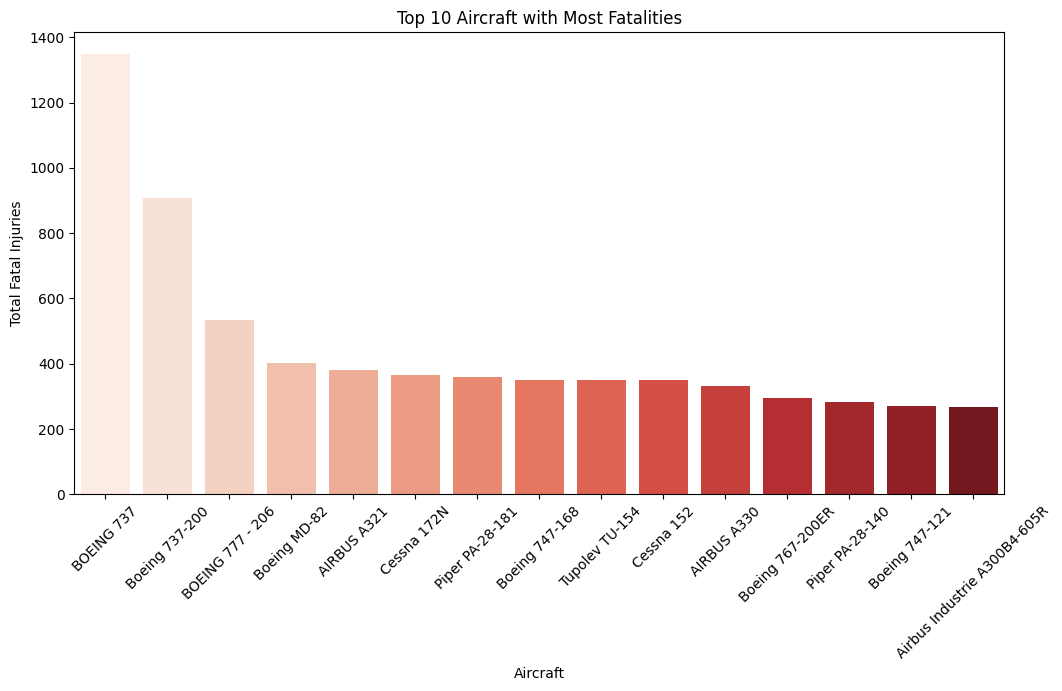

In [375]:
fatal_accidents = avt2.groupby('Aircraft')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=fatal_accidents.index, y=fatal_accidents.values, palette='Reds')
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft with Most Fatalities')
plt.xlabel('Aircraft')
plt.ylabel('Total Fatal Injuries')
plt.show()

The above ouput shows the top 10 planes with the highest number of fatalities. As an organiuzation looking to be successful in this field, it would be the organization's safest bet6 to avoid acquiring these planes. Now that we know what planes are to be avoided, what are the `safest` options then?

C:\Users\Stephen Kamiru\AppData\Local\Temp\ipykernel_20104\3549488773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_accidents.index, y=fatal_accidents.values, palette='Reds')


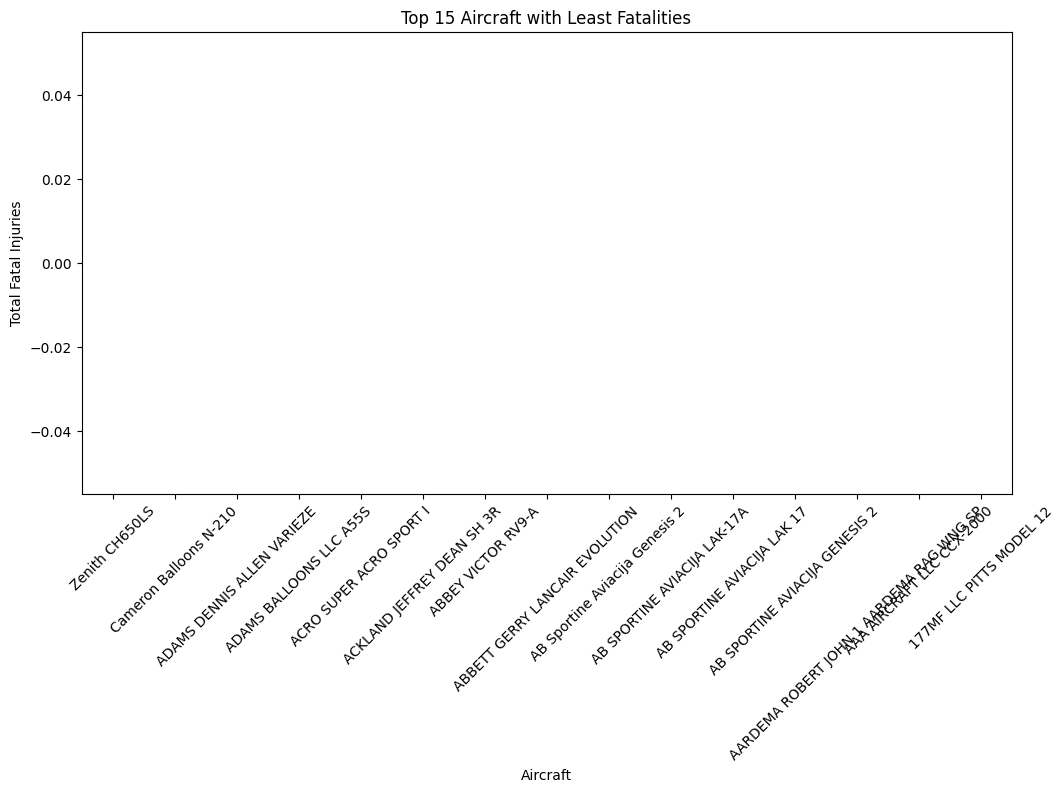

In [351]:
fatal_accidents = avt2.groupby('Aircraft')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).tail(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=fatal_accidents.index, y=fatal_accidents.values, palette='Reds')
# sns.heatmap(fatal_accidents, annot=True, fmt="d", cmap="coolwarm")
plt.xticks(rotation=45)
plt.title('Top 15 Aircraft with Least Fatalities')
plt.xlabel('Aircraft')
plt.ylabel('Total Fatal Injuries')
plt.show()

The above output above clearly indicates that the stated planes do not have any fatalities at all.

#### 3.What is the correlation of the number of engines to the occurrence of accidents?

From the provided dataset, we can decypher, using a heatmap, how much the number of engines affects the likelihood of a plane getting an accident.

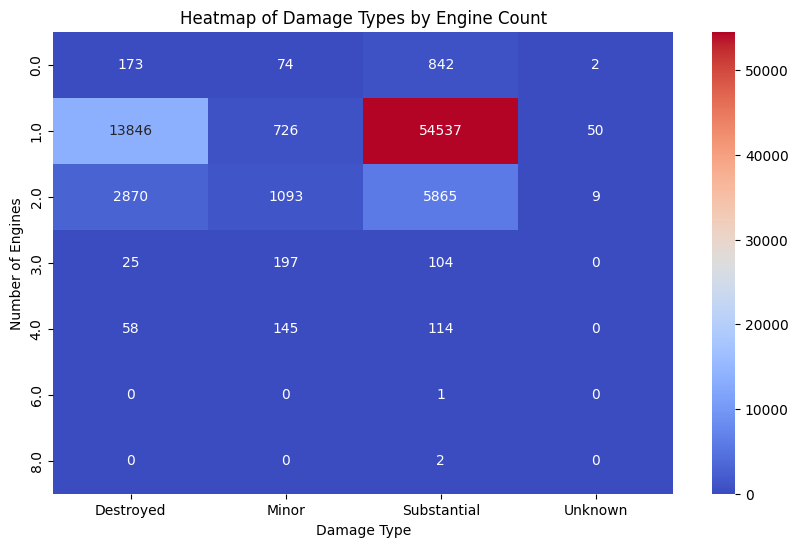

In [335]:
# Heatmap for number of engines vs accident counts
heatmap_data = avt2.groupby(['Number.of.Engines', 'Aircraft.damage']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
plt.title('Heatmap of Damage Types by Engine Count')
plt.xlabel('Damage Type')
plt.ylabel('Number of Engines')
plt.show()


* From the heatmap above, we get to see that the higher the number of engines, the safer the planes are. 
* We also get to see that the most severe damage has been experienced on planes with just a single engine.
* We could also use a bar graph to identify the same: 

C:\Users\Stephen Kamiru\AppData\Local\Temp\ipykernel_20104\2789242538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engines_accidents, x='Number.of.Engines', y='Accident_Count', palette='viridis')


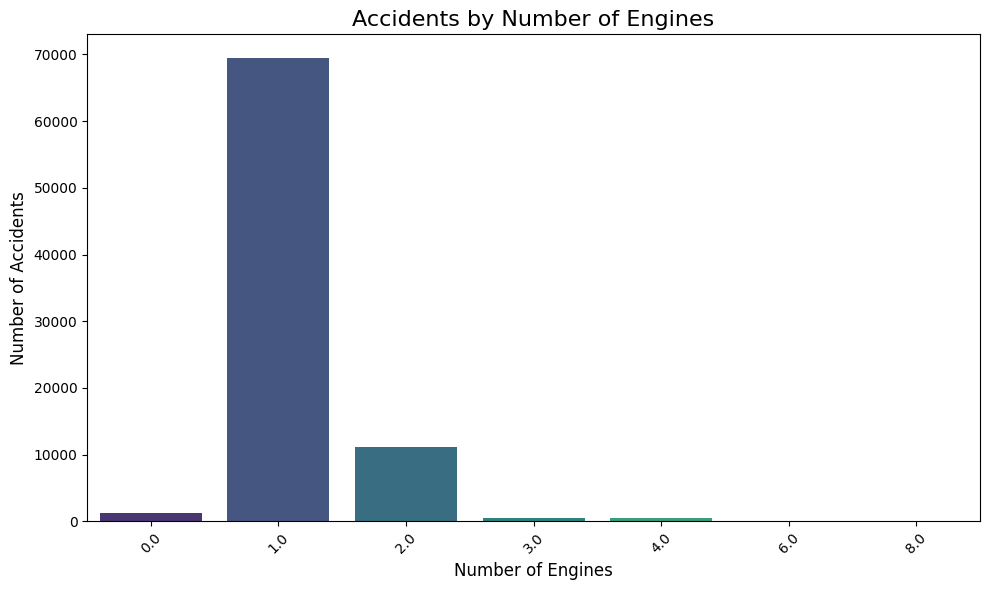

In [336]:
# Analyze the correlation between the number of engines and the occurrence of accidents
engines_accidents = avt2.groupby('Number.of.Engines').size().reset_index(name='Accident_Count')

# Plot the number of engines vs. accident count
plt.figure(figsize=(10, 6))
sns.barplot(data=engines_accidents, x='Number.of.Engines', y='Accident_Count', palette='viridis')

# Add labels and title
plt.title('Accidents by Number of Engines', fontsize=16)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.What sort of damages are expereinced to the planes in the event of an accident?

Now, in the event that we get into an accident, what will be the damage extent of the plane? Will we have to replace the plane or could we simply fix it? The graph below helps in answering this.

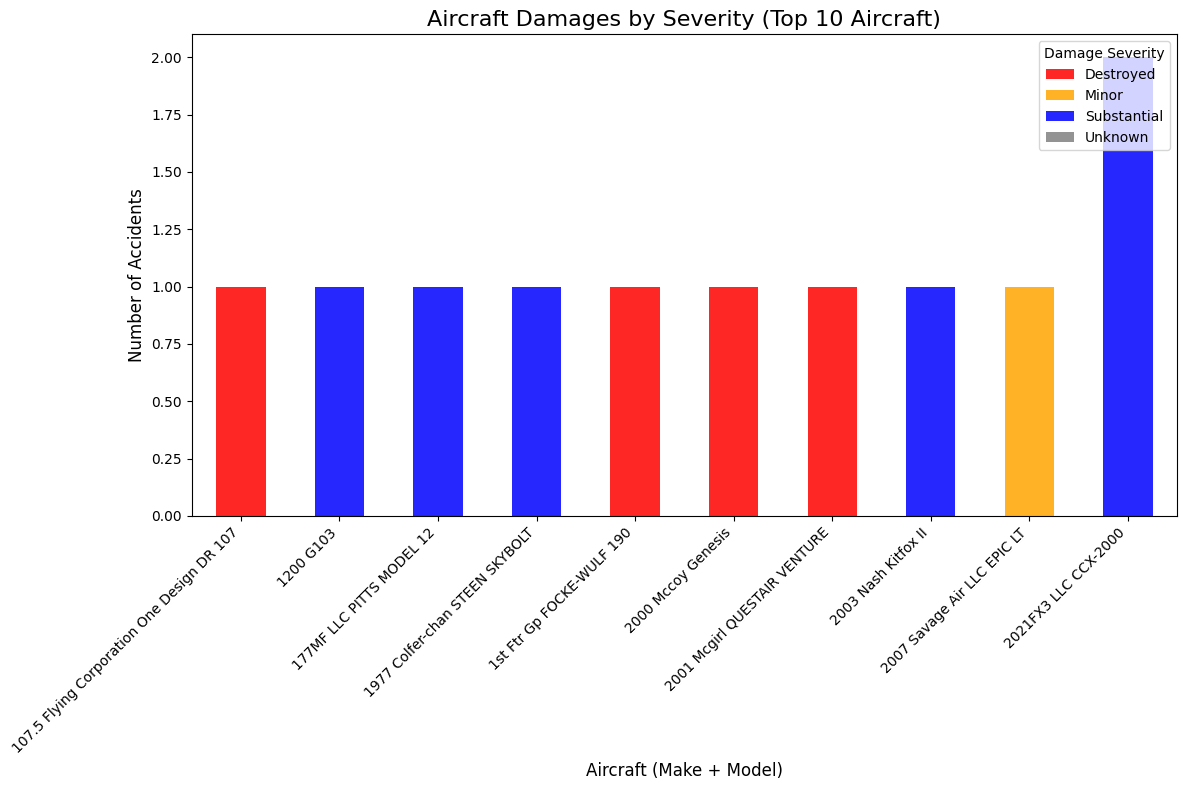

In [368]:
# 4. What sort of damages do planes acquire in accidents? 
damage_data = avt2.groupby(['Aircraft', 'Aircraft.damage']).size().unstack(fill_value=0)

# Plot the damage data
damage_data_top = damage_data.head(10)  # Display top 10 aircraft by accident counts for clarity
damage_data_top.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['red', 'orange', 'blue', 'gray'],  # Colors for each damage type
    alpha=0.85
)

plt.title('Aircraft Damages by Severity (Top 10 Aircraft)', fontsize=16)
plt.xlabel('Aircraft (Make + Model)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Damage Severity', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The above output shows the planes that experience significant damages. What about the ones that experience the least amount of damage? 
These can be seen below!!

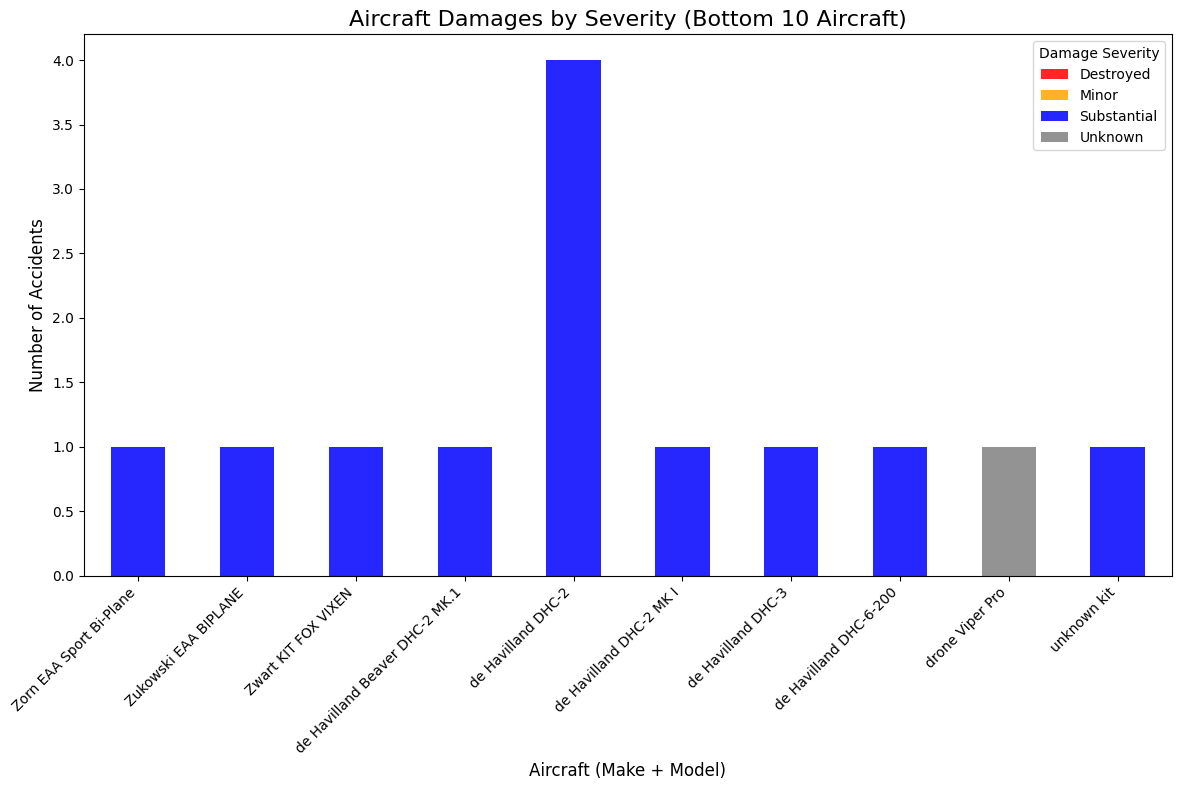

In [338]:
# 4. What sort of damages do planes acquire in accidents? (Bar Chart)
damage_data = avt2.groupby(['Aircraft', 'Aircraft.damage']).size().unstack(fill_value=0)

# Plot the damage data
damage_data_top = damage_data.tail(10)  # Display bottom 10 aircraft by accident counts for clarity
damage_data_top.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['red', 'orange', 'blue', 'gray'],  # Colors for each damage type
    alpha=0.85
)

plt.title('Aircraft Damages by Severity (Bottom 10 Aircraft)', fontsize=16)
plt.xlabel('Aircraft (Make + Model)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Damage Severity', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 5.In the event of an accident, what are the type of injuries experienced by the passengers on board?

* We now need to focus on the safety of the passengers again. 
* In the event of an injury, what are the injuries experienced on-board? 
* Do the passengers have a chance of surviving?
* If they do survive, what sort of injuries will they walk away with?

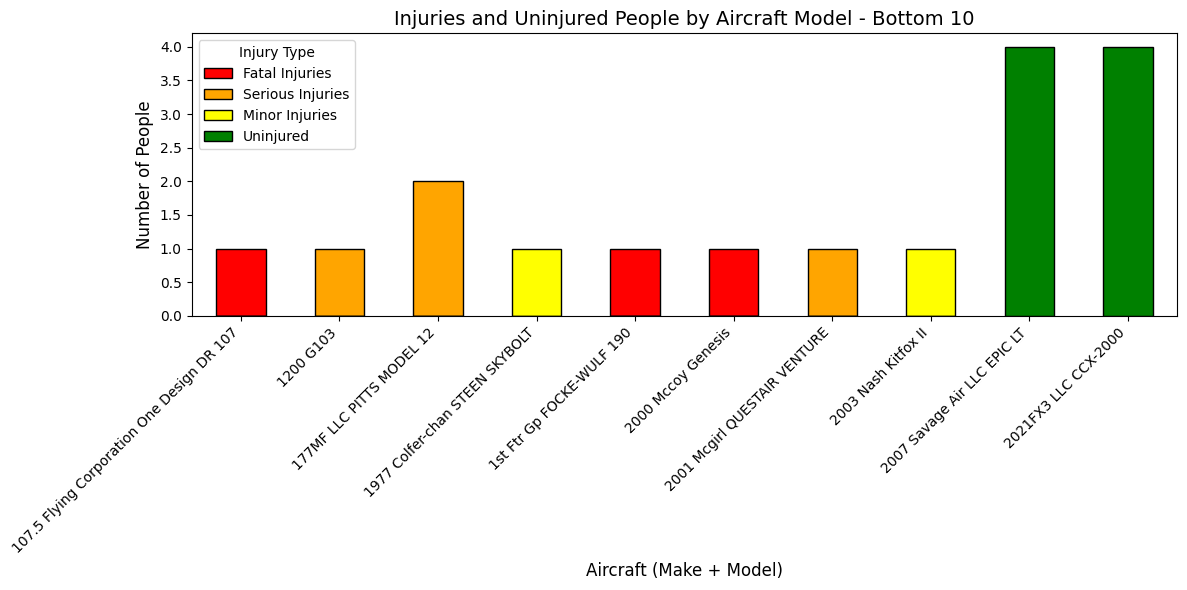

In [339]:
# Sum up injury columns by Aircraft 
aircraft_injuries = avt2.groupby('Aircraft')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum().head(10).reset_index()

# Plot a stacked bar chart with Aircraft on x-axis and the number of people on y-axis
aircraft_injuries.set_index('Aircraft').plot(
    kind='bar',
    stacked=True,
    color=['red', 'orange', 'yellow', 'green'],
    figsize=(12, 6),
    edgecolor='black'
)

# Add titles and labels
plt.title('Injuries and Uninjured People by Aircraft Model - Bottom 10', fontsize=14)
plt.xlabel('Aircraft (Make + Model)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(title='Injury Type', labels=['Fatal Injuries', 'Serious Injuries', 'Minor Injuries', 'Uninjured'], fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()



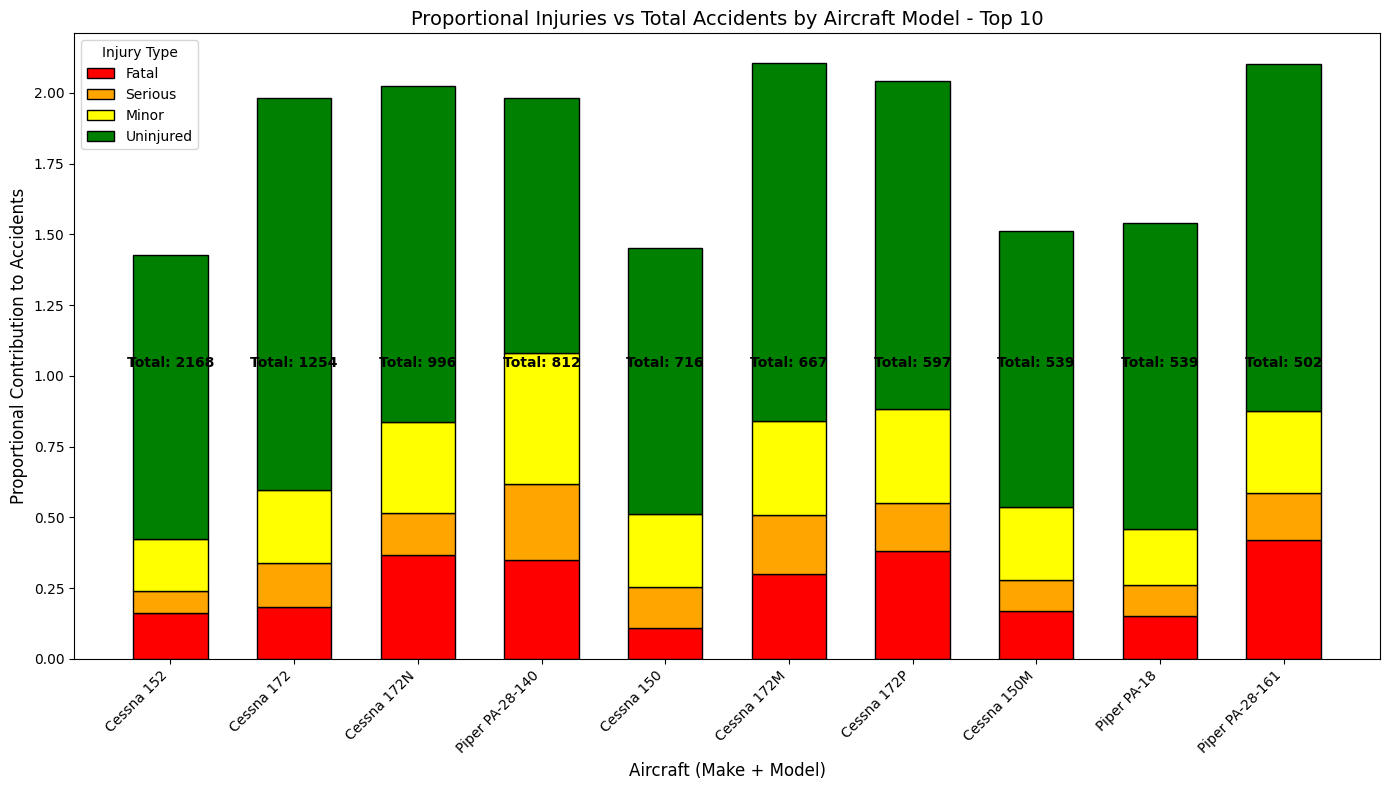

In [366]:
# Merge accident counts with injury data
aircraft_injuries = avt2.groupby('Aircraft')[
    ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
].sum().reset_index()
aircraft_accident_counts = avt2.groupby('Aircraft').size().reset_index(name='Accident_Count')

# Combine the datasets
aircraft_analysis = pd.merge(aircraft_accident_counts, aircraft_injuries, on='Aircraft')

# Normalize injury data to proportions relative to the total accidents
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
aircraft_analysis[injury_cols] = aircraft_analysis[injury_cols].div(aircraft_analysis['Accident_Count'], axis=0)

# Sort by accident count and select top 10 for visualization
top_aircraft = aircraft_analysis.sort_values('Accident_Count', ascending=False).head(10)

# Plot the chart
plt.figure(figsize=(14, 8))

# Initialize bar positions
x_positions = np.arange(len(top_aircraft['Aircraft']))
bar_width = 0.6
colors = ['red', 'orange', 'yellow', 'green']  # Colors for different injury types

# Plot stacked bars for proportional injuries
bottoms = np.zeros(len(top_aircraft))
for i, col in enumerate(injury_cols):
    plt.bar(
        x_positions,
        top_aircraft[col],
        bottom=bottoms,
        color=colors[i],
        edgecolor='black',
        width=bar_width,
        label=col.replace('Total.', '').replace('.Injuries', '')
    )
    bottoms += top_aircraft[col]

# Overlay total accident counts on top of the bars
for i, count in enumerate(top_aircraft['Accident_Count']):
    plt.text(
        x_positions[i],
        1.02,  # Above the bar
        f'Total: {int(count)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        weight='bold'
    )

# Add labels, title, and legend
plt.xticks(x_positions, top_aircraft['Aircraft'], rotation=45, ha='right', fontsize=10)
plt.title('Proportional Injuries vs Total Accidents by Aircraft Model - Top 10', fontsize=14)
plt.xlabel('Aircraft (Make + Model)', fontsize=12)
plt.ylabel('Proportional Contribution to Accidents', fontsize=12)
plt.legend(title='Injury Type', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


* The above output displays the planes that are generally `unsafe` in the event of an accident.
* Now that we have identified these planes, what are the safest ones? This can be viewed below:

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

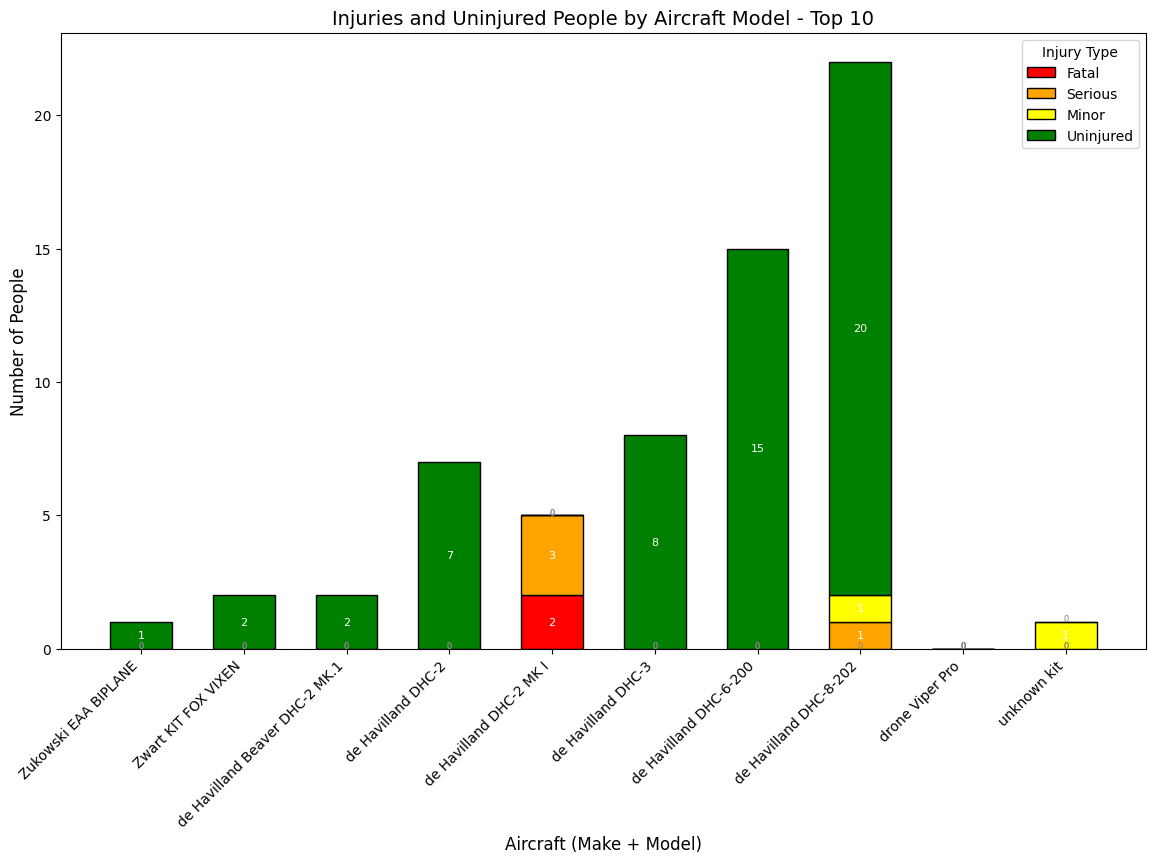

In [362]:
# Sum up injury columns by Aircraft
aircraft_injuries = avt2.groupby('Aircraft')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum().tail(10).reset_index()

# Define bar colors for each injury type
colors = ['red', 'orange', 'yellow', 'green']

# Plot stacked bars with custom annotations
plt.figure(figsize=(14, 8))

# Initialize bar positions
x_positions = np.arange(len(aircraft_injuries['Aircraft']))
bar_width = 0.6

# Create a stacked bar chart
bottoms = np.zeros(len(aircraft_injuries))
for i, col in enumerate(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']):
    # Plot each injury type
    plt.bar(
        x_positions,
        aircraft_injuries[col],
        bottom=bottoms,
        color=colors[i],
        edgecolor='black',
        width=bar_width,
        label=col.replace('Total.', '').replace('.Injuries', '')
    )
    
    # Annotate bar segments (show "0" or leave empty for zero values)
    for j, value in enumerate(aircraft_injuries[col]):
        if value > 0:
            plt.text(
                x_positions[j],
                bottoms[j] + value / 2,  # Position at the center of the segment
                int(value),
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )
        else:
            plt.text(
                x_positions[j],
                bottoms[j] + 0.1,  # Slightly above the bar base
                "0",
                ha='center',
                va='center',
                fontsize=6,
                color='gray'
            )
    # Update bottoms for stacking
    bottoms += aircraft_injuries[col]

# Add labels, title, and legend
plt.xticks(x_positions, aircraft_injuries['Aircraft'], rotation=45, ha='right', fontsize=10)
plt.title('Injuries and Uninjured People by Aircraft Model - Top 10', fontsize=14)
plt.xlabel('Aircraft (Make + Model)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Injury Type', fontsize=10)
plt.tight_layout


From the output, we can clearly see that the displayed planes are relatively safer for the passengers on-board.

## FINDINGS AND RECOMMENDATIONS

Now that we have run all our code and analyzed the data fully, what recommendation can we put forth?

1. What planes are prone to accidents?
* The planes to acquire based on this domain are :
```
        CHILDS MICHAEL  A ROTORWAY EXEC 162-F,
        DANIEL ANTHONY PROCTOR M24 ORION PLUS,
        EXTRA EA300,
        SEACE DAVID A GYROPLANE,
        SIKORSKY MH-60R,
        SIKORSKY UH-60A,
        GALLAGHER XLT-RG,
        CESSNA P206D,
        DETRICK DONALD G DETRICK DA-2,
        North American NAVION L-17B,
        PHANTOM PHANTOM,
        RUTAN Long-EZ,
        GREG HOBBS LIGHTNING,
        ROTORSPORT UK LTD CAVALON,
        JAMES R DERNOVSEK KITFOX S5
```

2. WHAT PLANES AFTER AN ACCIDENT HAS MORE FATALITIES?

Based off this question, then these are the planes with lowest number of fatalities:
``` 
    Zenith CH650LS,
    Cameron Balloons N-210,
    ADAMS DENNIS ALLEN VARIEZE,
    ADAMS BALLOONS LLC A55S,
    ACRO SUPER ACRO SPORT I,
    ACKLAND JEFFREY DEAN SH 3R,
    ABBEY VICTOR RV9-A,
    ABBETT GERRY LANCAIR EVOLUTION,
    AB Sportine Aviacija Genesis 2,
    AB SPORTINE AVIACIJA LAK-17A,
    AB SPORTINE AVIACIJA LAK 17,
    AB SPORTINE AVIACIJA GENESIS 2,
    AARDEMA ROBERT JOHN 1 AARDEMA RAG WNG SP,
    AAA AIRCRAFT LLC CCX-2000,
    177MF LLC PITTS MODEL 12
```

Just to mention a few!!


3. What is the correlation of the number of engines to the occurrence of accidents?

From the heatmap and the bar graph, we can clearly see that there higher the number of engines, the reduced chances of an accident occuring!!

4. What sort of damages are expereinced to the planes in the event of an accident?

In the event of an accident, we will need to keep in mind the likelihood of there being damages on the plane. However, the following planes have the least amount of damages to them: 
```
    Zorn EAA Sport Bi-Plane,
    Zukowski EAA BIPLANE,
    Zwart KIT FOX VIXEN,
    de Havilland Beaver DHC-2 MK.1,
    de Havilland DHC-2,
    de Havilland DHC-2 MK I,
    de Havilland DHC-3,
    de Havilland DHC-6-200,
    drone Viper Pro
```


5. In the event of an accident, what are the type of injuries experienced by the passengers on board?

With the need to focus on passenger safety in the event of an accident, we focused on the injuries that were recorded during accidents in the past. With this, we identified that the following planes were significantly safer for the passengers:
``` 
    Zukowski EAA BIPLANE,
    Zwart KIT FOX VIXEN,
    de Havilland Beaver DHC-2 MK.1,
    de Havilland DHC-2,
    de Havilland DHC-2 MK I,
    de Havilland DHC-3,
    de Havilland DHC-6-200,
    de Havilland DHC-8-202,
    drone Viper Pro-safest
```

## WHAT ARE THE 3 MAJOR RECOMMENDATIONS THAT CAN BE OBTAINED FROM THIS?

1. The safest planes to acquire solely based on the likelihood of being in an accident are the SIROSKY make.

2. Ideally having more than one engine on the plane is way safer than having just one as in case of failure of the one, there is an increased likelihood of an accident

3. In the long run, the ge Havilland make is cheap. This is because, in the event of an accident, this make sustains minor damages that can therefore be fixed as compared to the planes that are usually fully destroyed thus needing an extensive amount to acquire new planes.